In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import cufflinks as cf
cf.go_offline(connected=True)

## Risk free rate

금융투자협회 채권정보센터에서 채권시가평가기준 수익률을 제공 http://www.kofiabond.or.kr/

해당기간(2010~2019)의 3월물 채권의 민평평균 데이터를 가져왔다. 

그러나 시장 수익률이 아닌 YTM을 제공하므로 이를 시장 수익률로 변환하는 과정이 필요하여 계산함.

Calendar return portfolio에서 rf를 차감하여 사용했음.

In [116]:
return_df = pd.read_csv('../data/kospi/preprocessed/df_return.csv',index_col=0)*100 #수익률들 다 % 단위로 변환
rf_df = pd.read_csv('../data/kospi/preprocessed/rf_df(return).csv',index_col=0)
ex_return_df = pd.read_csv('../data/kospi/preprocessed/excess_return_df.csv',index_col=0) #rf 뺀 초과수익률 df
rm_df = pd.read_csv('../data/kospi/raw/rm_kospi200.csv',index_col=0)*100

In [111]:
ex_return = return_df.values - rf_df['return'].values[:,np.newaxis] #RF를 뺀 excess return
ex_return_df = pd.DataFrame(data = ex_return,index = rf_df.index,columns = return_df.columns)
ex_return_df

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
dates,,,,,,,,,,,,,,,,,,,,,
20100104,0.340140,-1.231881,-3.989087,-2.729958,2.415022,-1.867154,3.631632,3.782735,3.994655,-0.109017,...,0.335428,2.129789,-0.256946,1.258764,0.747294,1.000334,-0.775506,-0.534549,0.620910,-0.611529
20100105,-0.667952,0.459145,-0.292503,-0.324603,-1.046883,-4.502406,-5.637863,-3.480388,-3.221050,-3.448208,...,-4.533795,0.912881,0.335428,1.540159,-2.974529,-4.027512,-0.753139,3.737137,6.171177,-1.287468
20100106,-0.890467,1.023479,3.570750,5.396232,1.906113,-0.729667,0.912091,-2.818330,5.033465,-2.469357,...,-2.420536,-0.972773,0.926727,-0.105721,-6.117259,-0.921382,1.325938,0.305802,0.121552,-0.446436
20100107,-1.690913,-0.945142,0.247782,2.654591,-0.338847,-2.635252,-4.640833,0.690123,-0.717826,-0.479268,...,0.367105,-2.147645,0.915069,-1.434262,-2.315566,-0.929197,0.692106,-0.516664,-1.240615,-1.303410
20100108,-0.335980,-0.949721,1.661061,6.361661,0.940788,0.764750,2.005094,-0.896374,0.918867,-0.479555,...,-2.464214,6.590705,-0.539249,0.193230,-1.652287,0.889301,0.396258,0.717322,-0.105723,0.067287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191223,0.865808,0.758086,-1.373161,0.638990,-0.070230,-1.111896,0.041627,1.338221,-0.491282,-0.388701,...,-0.191442,0.618476,0.500113,0.318875,-2.551619,-0.344955,-2.776257,-0.070230,0.757928,1.662696
20191224,1.475365,-0.686256,-1.060329,-0.070230,-0.725252,-0.070230,-0.181962,0.392733,-0.915896,2.006448,...,-0.919744,-0.207029,0.496878,-1.233020,0.693129,1.307181,1.320415,0.255503,-0.686246,-0.972033
20191226,1.147663,1.582782,-0.069993,1.338458,-0.289773,1.333516,0.824862,0.390837,0.996105,-1.321949,...,0.052406,0.203980,-0.069993,0.975759,-0.827569,1.288703,-0.693434,0.579358,0.343230,-0.171105


## CAR 

CAR은 Cumulative Abnormal Return 이며 abnormal return은 normal return 에 market return을 빼줘서 구한다.

처음에는 kospi200수익률을 사용했는데 universe가 113개의 기업이기 때문에 이들의 평균수익률로 바꿔주는걸로 수정.

In [6]:
rm_df.head() #kospi200 수익률

,return
dates,
20100104,0.730000
20100105,-0.290841
20100106,0.821217
20100107,-1.495527
20100108,0.610004


In [112]:
rm_ = return_df.mean(axis=1) #113개의 수익률
abnormal_return = return_df.values - rm_.values[:,np.newaxis]
abnormal_df = pd.DataFrame(abnormal_return,index = return_df.index, columns= return_df.columns)
abnormal_df

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20100104,-0.132617,-1.704638,-4.461844,-3.202715,1.942265,-2.339911,3.158875,3.309978,3.521898,-0.581774,...,-0.137329,1.657032,-0.729703,0.786007,0.274537,0.527576,-1.248263,-1.007306,0.148153,-1.084286
20100105,-0.042839,1.084258,0.332610,0.300510,-0.421770,-3.877293,-5.012750,-2.855275,-2.595937,-2.823095,...,-3.908682,1.537994,0.960541,2.165272,-2.349416,-3.402399,-0.128026,4.362250,6.796290,-0.662355
20100106,-1.326516,0.587430,3.134700,4.960182,1.470064,-1.165716,0.476042,-3.254379,4.597416,-2.905407,...,-2.856585,-1.408822,0.490678,-0.541770,-6.553308,-1.357431,0.889888,-0.130248,-0.314497,-0.882486
20100107,-0.913492,-0.167721,1.025203,3.432012,0.438574,-1.857831,-3.863412,1.467544,0.059595,0.298153,...,1.144526,-1.370224,1.692490,-0.656841,-1.538145,-0.151776,1.469527,0.260757,-0.463194,-0.525989
20100108,-0.977807,-1.591548,1.019234,5.719834,0.298961,0.122923,1.363267,-1.538201,0.277040,-1.121382,...,-3.106041,5.948878,-1.181076,-0.448597,-2.294114,0.247474,-0.245569,0.075495,-0.747550,-0.574540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191223,0.802928,0.695206,-1.436041,0.576110,-0.133110,-1.174776,-0.021253,1.275341,-0.554162,-0.451581,...,-0.254322,0.555595,0.437232,0.255995,-2.614499,-0.407835,-2.839137,-0.133110,0.695048,1.599816
20191224,1.796917,-0.364704,-0.738777,0.251322,-0.403700,0.251322,0.139590,0.714285,-0.594344,2.327999,...,-0.598193,0.114523,0.818430,-0.911469,1.014681,1.628732,1.641967,0.577055,-0.364694,-0.650482
20191226,0.802657,1.237776,-0.414999,0.993452,-0.634779,0.988510,0.479855,0.045830,0.651099,-1.666955,...,-0.292600,-0.141027,-0.414999,0.630752,-1.172575,0.943696,-1.038441,0.234351,-0.001776,-0.516111
20191227,0.386307,1.111688,3.687059,-1.674052,-1.515584,-1.389065,-0.975912,-1.606519,1.952882,0.211624,...,0.564810,-0.405837,-1.192640,-2.288361,-0.076299,-1.725809,2.443647,-1.893586,3.567718,-2.045734


## Portfolio Outlier check

In [31]:
ex_values = [ x for x in return_df.mean(1).values]
ex_index = [x for x in return_df.index]

mean_ex_return = pd.DataFrame(ex_values,index = ex_index, columns = {'mean_return'})
mean_ex_return.index = pd.to_datetime(ex_index, format = "%Y%m%d")
mean_ex_return

,mean_return
2010-01-04,0.581774
2010-01-05,-0.516096
2010-01-06,0.541770
2010-01-07,-0.670593
2010-01-08,0.747550
...,...
2019-12-23,0.133110
2019-12-24,-0.251322
2019-12-26,0.414999
2019-12-27,-0.687059


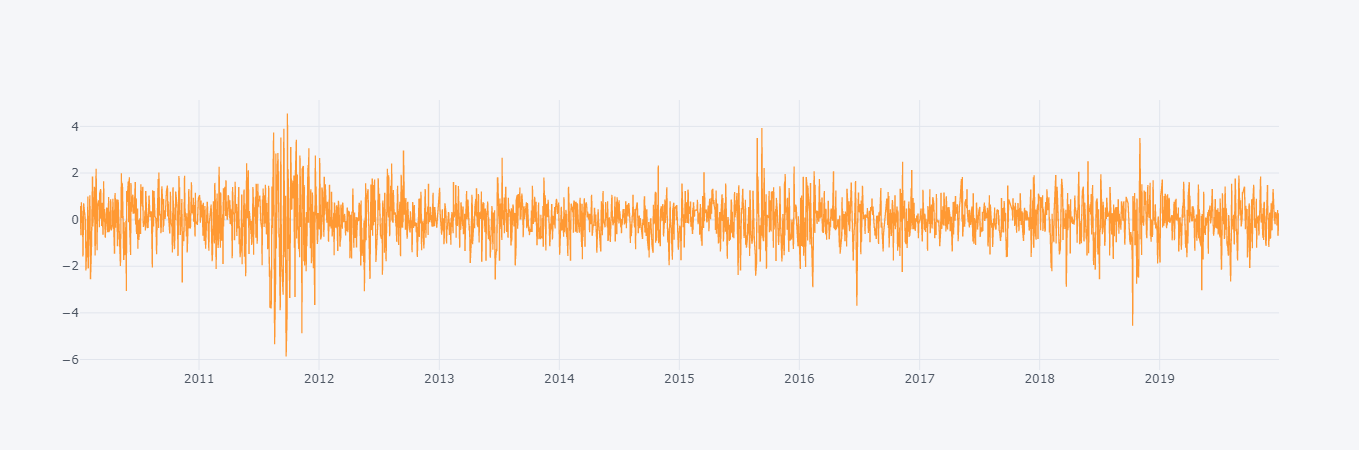

In [30]:
mean_ex_return.iplot()